In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn_pandas
import sklearn

In [2]:
df=pd.read_csv('Downloads/IncomePrediction/code/IncomePrediction_final/data/incomeData.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:
df.replace('?',np.NaN,inplace=True)

In [6]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [7]:
cols=df.columns
mc=[]
a=df.isna().sum()
for i in range(15):
    if a[i]>0:
        mc.append(cols[i])
        

In [8]:
len(a)

15

In [9]:
mc

['workclass', 'occupation', 'native-country']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [12]:
for feature in ['workclass','occupation','native-country']:
    impute_nan(df,feature)

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [14]:
df.drop(columns=['education'], inplace=True)

In [15]:
cat_df = df.select_dtypes(include=['object']).copy()

In [16]:
cat_df.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
cat_df.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'Income'],
      dtype='object')

In [18]:
cat_df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [19]:
cat_df['Income'] = cat_df['Income'].map({'<=50K' : 0, '>50K' : 1})

In [20]:
for col in cat_df.drop('Income',axis=1).columns:
    x=cat_df[col].head(1)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [21]:
cat_df.head()

,Income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
num_df = df.select_dtypes(include=['int64']).copy()

In [23]:
num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [26]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [27]:
scaled_num_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [28]:
final_df=pd.concat([scaled_num_df,cat_df], axis=1)

In [29]:
final_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = final_df.drop(['Income'], axis=1)
y = final_df['Income']

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

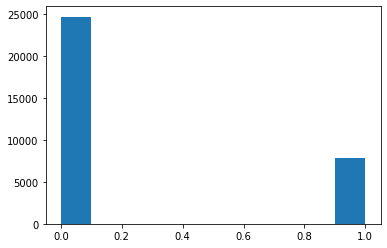

In [32]:
plt.hist(y)

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(X,y)

In [35]:
x_sampled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,0.103983,-0.369720,1.134739,13.394578,-0.21666,2.799212,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49436,0.837109,0.061854,-0.031360,0.895083,-0.21666,-0.035429,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49437,0.910422,-1.563154,-0.031360,-0.145920,-0.21666,4.742967,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49438,0.397233,1.977242,-0.031360,-0.145920,-0.21666,2.394264,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y_sampled

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: Income, Length: 49440, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

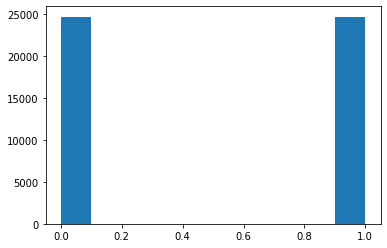

In [37]:
plt.hist(y_sampled)

In [38]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_sampled,y_sampled, random_state=355 )

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
gnb = GaussianNB(priors=None, var_smoothing=0.05)

In [40]:
y_pred = gnb.fit(train_x, train_y).predict(test_x)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
sc=accuracy_score(test_y,y_pred)
sc

0.8068770226537216

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [45]:
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [46]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.684 total time=   0.1s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.684 total time=   0.1s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.691 total time=   0.1s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.690 total time=   0.1s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.689 total time=   0.1s
[CV 1/5] END .................var_smoothing=0.1;, score=0.807 total time=   0.1s
[CV 2/5] END .................var_smoothing=0.1;, score=0.801 total time=   0.1s
[CV 3/5] END .................var_smoothing=0.1;, score=0.807 total time=   0.1s
[CV 4/5] END .................var_smoothing=0.1;, score=0.803 total time=   0.1s
[CV 5/5] END .................var_smoothing=0.1;, score=0.808 total time=   0.1s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.781 total time=   0.1s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=0.05),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [47]:
grid.best_estimator_

GaussianNB(var_smoothing=0.05)

In [48]:
import xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,gamma=0)

In [51]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

/home/cheems/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
ac2 = accuracy_score(test_y,y_pred)
ac2

0.8690938511326861

In [55]:
param_grid = {"n_estimators": [10, 50, 100], 
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [56]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/cheems/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [57]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)